In [44]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 16]

In [45]:
master_image = cv.imread('cat.png')
master_gray  = cv.cvtColor(master_image, cv.COLOR_BGR2GRAY)

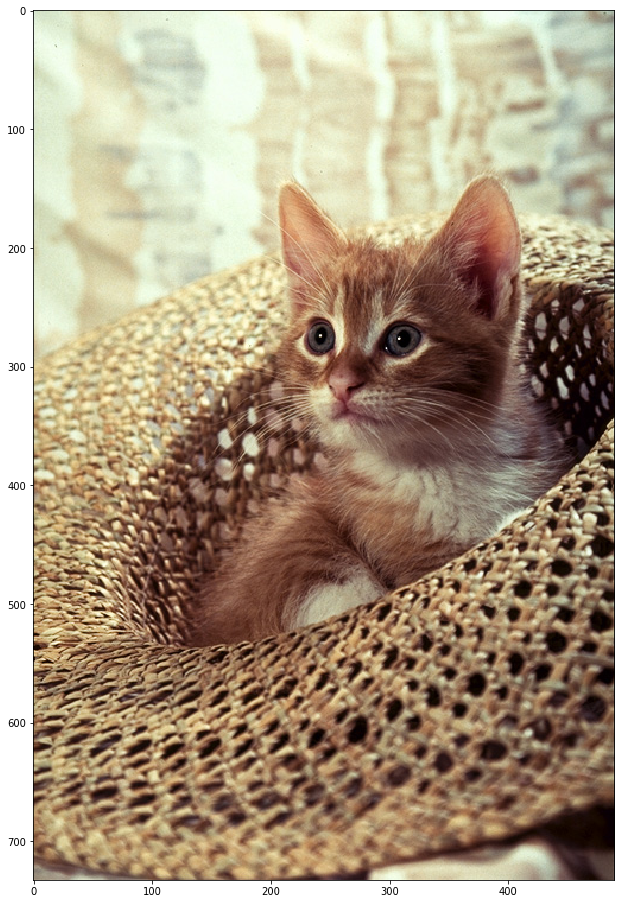

In [46]:
def display_image(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
display_image(master_image)

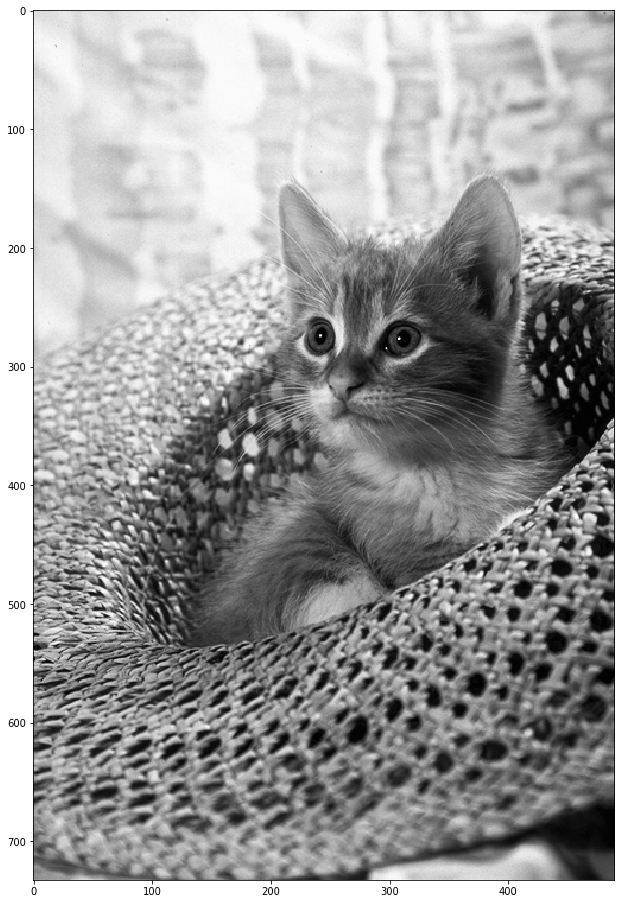

In [47]:
display_image(master_gray)

In [48]:
sobel_1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], np.float32)
#sobel_1 = sobel_1 / np.sum(sobel_1)
sobel_2 = np.array([[1, 2, 1], [0,0,0,], [-1,-2,-1]], np.float32)
#sobel_2 = sobel_2 / np.sum(sobel_2)

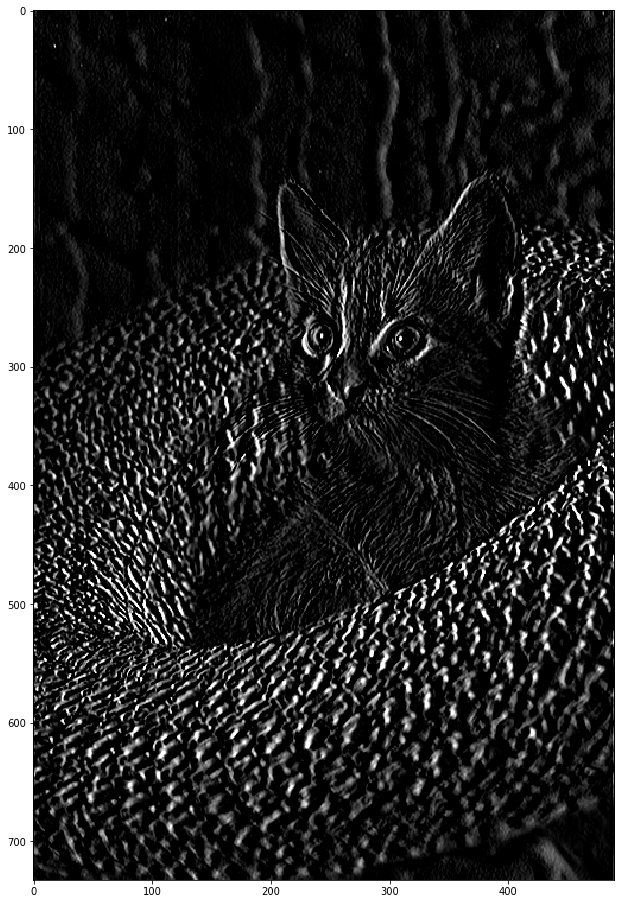

In [49]:
op1 = cv.filter2D(master_gray, -1, sobel_1)
display_image(op1)

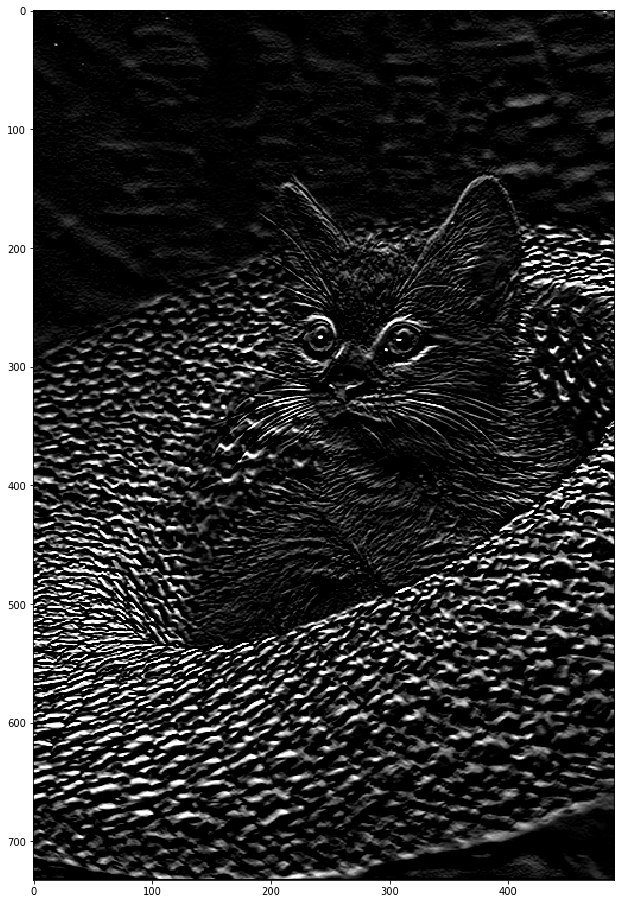

In [50]:
op2 = cv.filter2D(master_gray, -1, sobel_2)
display_image(op2)

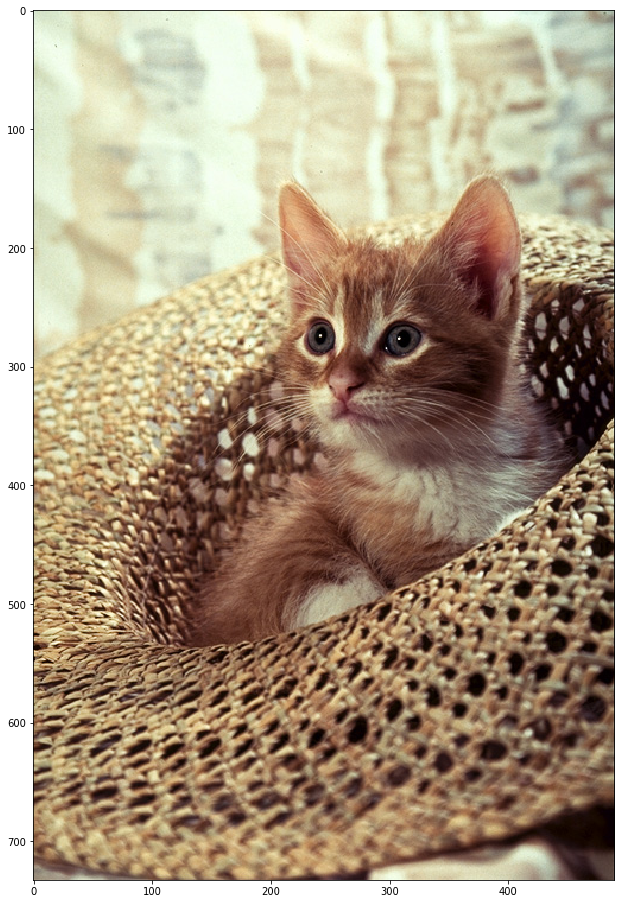

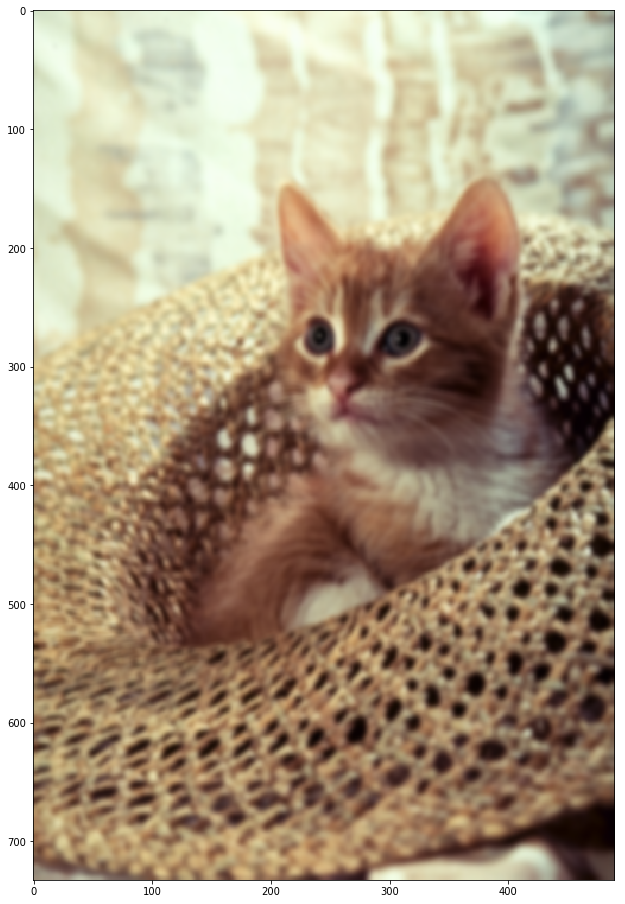

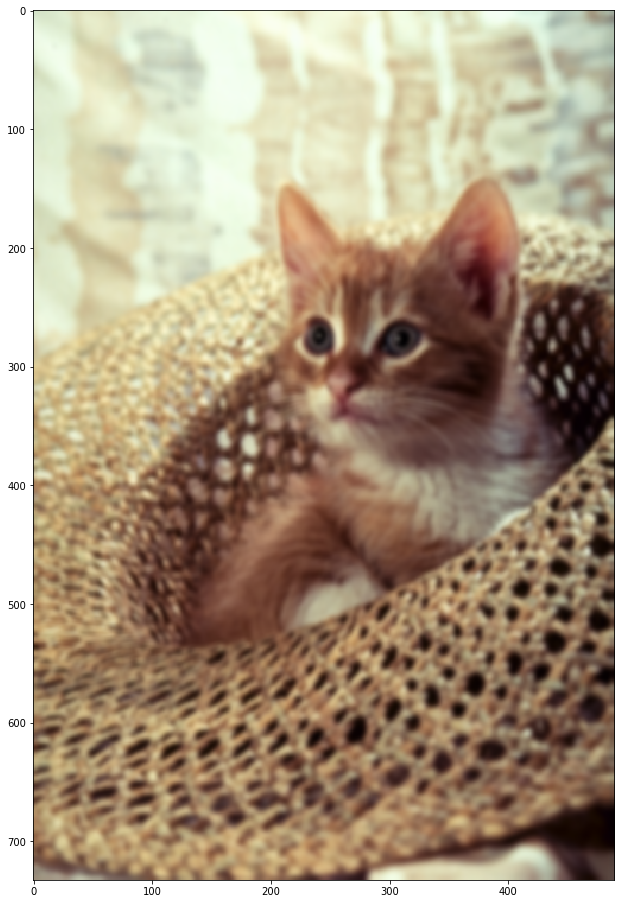

In [52]:
import math
def fm1_value(x, y, sigma):
    ret = math.exp(-1 * (x ** 2 + y ** 2) / (2 * math.pow(sigma, 2)))
    ret = -1 * ret / (2 * math.pi * math.pow(sigma, 4)) * x
    return ret

def fm2_value(x, y, sigma):
    ret = math.exp(-1 * (x ** 2 + y ** 2) / (2 * math.pow(sigma, 2)))
    ret = -1 * ret / (2 * math.pi * math.pow(sigma, 4)) * y
    return ret
    
def get_gaussian1(sigma):
    arr = [[0] * 5] * 5
    for i in range(5):
        for j in range(5):
            arr[i][j] = fm1_value(i, j, sigma)
    arr = np.array(arr)
    arr = arr / np.sum(arr)
    return arr

def get_gaussian2(sigma):
    arr = [[0] * 5] * 5
    for i in range(5):
        for j in range(5):
            arr[i][j] = fm2_value(i, j, sigma)
    arr = np.array(arr)
    arr = arr / np.sum(arr)
    return arr

g1_5 = get_gaussian1(5)
g2_5 = get_gaussian2(5)
g1_10 = get_gaussian1(1000)
g2_10 = get_gaussian2(1000)


display_image(master_image)
plt.show()
ii = cv.filter2D(cv.filter2D(master_image, -1, g1_5), -1, g2_5)
display_image(ii)
plt.show()
ii = cv.filter2D(cv.filter2D(master_image, -1, g1_10), -1, g2_10)
display_image(ii)



In [68]:
f = np.fft.fft2(master_image)
fshift = 

error: OpenCV(4.5.1) /tmp/pip-req-build-n_alixql/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)
